In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import random, shuffle
import itertools

# Some Exploration of NxGraph

In [2]:
# generate a random adjacency matrix in numpy
a = np.random.randint(0, 2, size=(10, 10))
b = np.random.randint(0, 2, size=(10, 10))
a

array([[0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 0, 1, 1]])

In [3]:
g1 = nx.Graph(a)
g2 = nx.Graph(b)

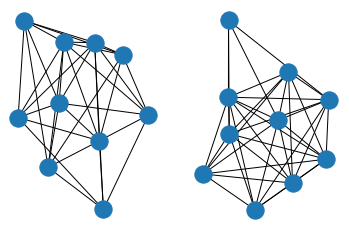

In [4]:
# two graphs side by side
p = plt.subplot(121)
nx.draw(g1)
p = plt.subplot(122)
nx.draw(g2)

# Starting Small

In [5]:
# make a small, fully connected graph
size = 6
s = (size, size)
g_adj_matrix_stable = np.ones(s)
g = nx.Graph(g_adj_matrix_stable)

g_adj_matrix_stable

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

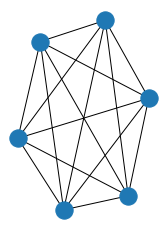

In [6]:
plt.subplot(121)
nx.draw(g)

In [7]:
# generate some random numbers in our size
for i in range(0, 4):
    print(int(random() * size))

4
1
4
3


In [8]:
# prolly need a function that generates two of them actually
def randomPair(s):
    return int(random() * s), int(random() * s)
    
randomPair(size)

(0, 4)

In [9]:
g_adj_matrix = g_adj_matrix_stable.copy()
matrices = []

for i in range(0, 15):
    x, y = randomPair(size)
    # delete edge symmetrically
    g_adj_matrix[x][y] = 0
    g_adj_matrix[y][x] = 0
    matrices.append(g_adj_matrix.copy())
    
len(matrices)

15

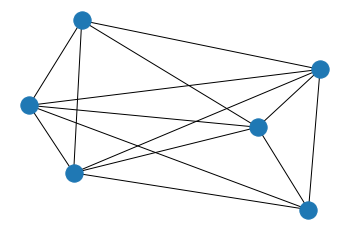

~~~~~~~~~~~~~~~~~~~~~~~~~


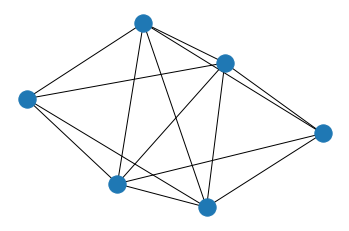

~~~~~~~~~~~~~~~~~~~~~~~~~


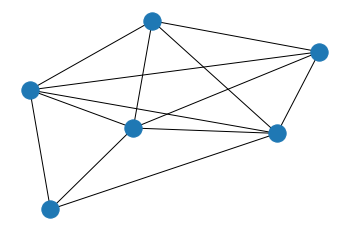

~~~~~~~~~~~~~~~~~~~~~~~~~


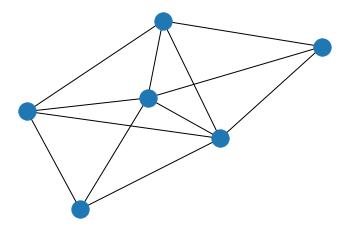

~~~~~~~~~~~~~~~~~~~~~~~~~


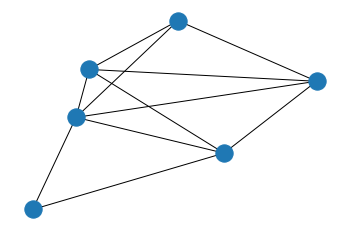

~~~~~~~~~~~~~~~~~~~~~~~~~


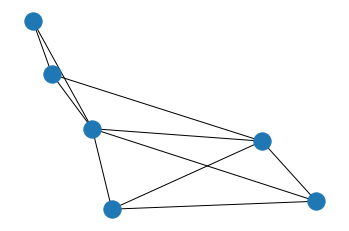

~~~~~~~~~~~~~~~~~~~~~~~~~


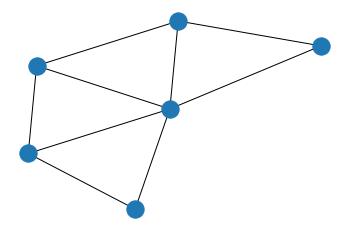

~~~~~~~~~~~~~~~~~~~~~~~~~


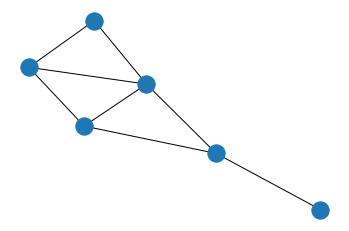

~~~~~~~~~~~~~~~~~~~~~~~~~


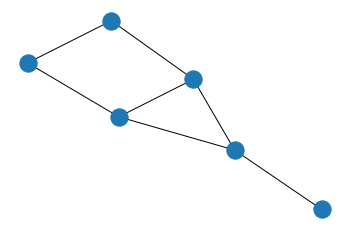

~~~~~~~~~~~~~~~~~~~~~~~~~


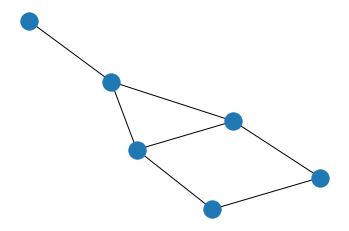

~~~~~~~~~~~~~~~~~~~~~~~~~


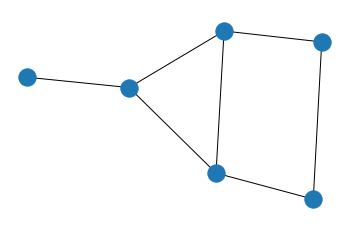

~~~~~~~~~~~~~~~~~~~~~~~~~


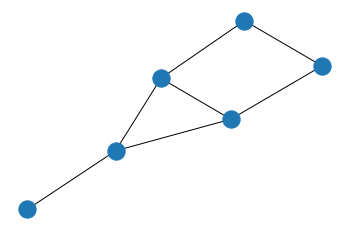

~~~~~~~~~~~~~~~~~~~~~~~~~


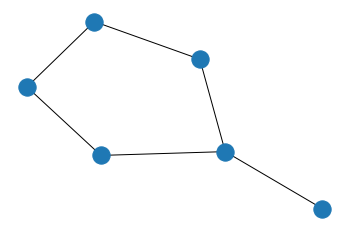

~~~~~~~~~~~~~~~~~~~~~~~~~


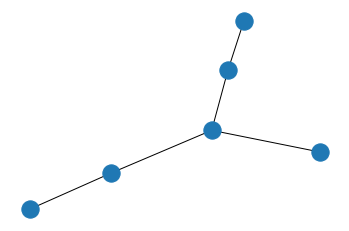

~~~~~~~~~~~~~~~~~~~~~~~~~


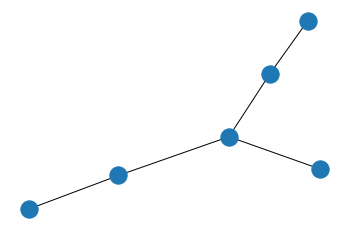

~~~~~~~~~~~~~~~~~~~~~~~~~


In [10]:
# let's plot that shit and see what it looks like
for m in matrices:
    g_draw = nx.Graph(m)
    plt.figure()
    plt.plot()
    nx.draw(g_draw)
    g_draw = None
    plt.show()
    print("~~~~~~~~~~~~~~~~~~~~~~~~~")


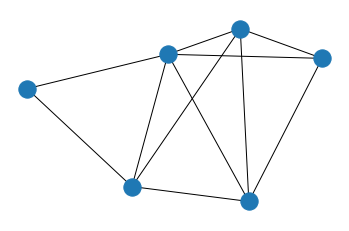

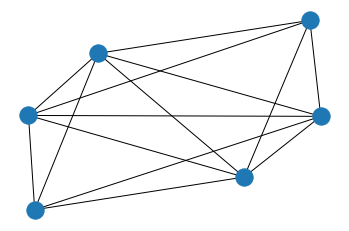

(array([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]), array([[1., 1., 0., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 0., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.]]))

In [11]:
# wtf that doesn't seem right
g_draw = nx.Graph(matrices[4])
plt.figure()
plt.plot()
nx.draw(g_draw)
plt.show()

g_draw = nx.Graph(matrices[0])
plt.figure()
plt.plot()
nx.draw(g_draw)
plt.show()

matrices[0], matrices[4]

# aha figured it out reference BS issues

# How to Separate to Two Communities (Ez Mode)

In [3]:
# make a fully connected graph
size = 60
nodes = [x for x in range(0, size)]
s = (size, size)
mCom = np.ones(s)
g = nx.Graph(mCom)

mCom, nodes

(array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59])

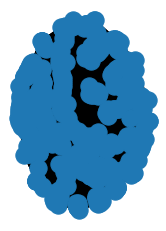

In [13]:
# look at it for fun
plt.subplot(121)
nx.draw(g)

In [4]:
# separate into 2 communities
shuffle(nodes)

first_community = nodes[:int(size/2)]
second_community = list(set(nodes) - set(first_community))

nodes, first_community, second_community

([24,
  39,
  26,
  41,
  53,
  10,
  16,
  56,
  11,
  23,
  55,
  13,
  34,
  44,
  47,
  29,
  49,
  7,
  33,
  22,
  36,
  52,
  19,
  48,
  27,
  1,
  17,
  0,
  6,
  21,
  18,
  28,
  59,
  45,
  37,
  15,
  38,
  58,
  31,
  35,
  2,
  8,
  9,
  43,
  32,
  4,
  12,
  20,
  5,
  14,
  25,
  30,
  3,
  42,
  40,
  51,
  57,
  50,
  54,
  46],
 [24,
  39,
  26,
  41,
  53,
  10,
  16,
  56,
  11,
  23,
  55,
  13,
  34,
  44,
  47,
  29,
  49,
  7,
  33,
  22,
  36,
  52,
  19,
  48,
  27,
  1,
  17,
  0,
  6,
  21],
 [2,
  3,
  4,
  5,
  8,
  9,
  12,
  14,
  15,
  18,
  20,
  25,
  28,
  30,
  31,
  32,
  35,
  37,
  38,
  40,
  42,
  43,
  45,
  46,
  50,
  51,
  54,
  57,
  58,
  59])

In [5]:
# going to use some python slickness here
connections = [i for i in itertools.combinations_with_replacement(nodes, 2)]

connections[:4]

[(24, 24), (24, 39), (24, 26), (24, 41)]

In [6]:
# remove "allowed connections"
first_community_connections = [i for i in itertools.permutations(first_community, 2)]
second_community_connections = [i for i in itertools.permutations(second_community, 2)]
loops = [(x,x) for x in range(0,size)]

connections = list(set(connections) - set(first_community_connections))
connections = list(set(connections) - set(loops))
illegal_connections = list(set(connections) - set(second_community_connections))

illegal_connections

[(7, 3),
 (56, 51),
 (55, 5),
 (22, 57),
 (29, 50),
 (27, 46),
 (16, 9),
 (6, 28),
 (21, 28),
 (47, 35),
 (19, 4),
 (17, 20),
 (7, 25),
 (56, 25),
 (55, 35),
 (44, 4),
 (6, 54),
 (47, 9),
 (34, 46),
 (17, 46),
 (41, 57),
 (13, 32),
 (33, 3),
 (48, 37),
 (36, 8),
 (34, 8),
 (49, 32),
 (39, 45),
 (13, 58),
 (24, 14),
 (48, 59),
 (1, 28),
 (49, 58),
 (13, 20),
 (26, 12),
 (53, 20),
 (1, 54),
 (49, 28),
 (21, 59),
 (26, 54),
 (0, 45),
 (56, 58),
 (55, 2),
 (1, 40),
 (47, 40),
 (21, 37),
 (52, 37),
 (56, 32),
 (22, 42),
 (29, 37),
 (44, 3),
 (16, 38),
 (21, 15),
 (22, 12),
 (44, 25),
 (33, 4),
 (23, 9),
 (10, 14),
 (34, 3),
 (17, 57),
 (39, 42),
 (13, 51),
 (11, 15),
 (48, 50),
 (49, 51),
 (0, 14),
 (24, 59),
 (48, 8),
 (1, 15),
 (39, 30),
 (29, 4),
 (23, 50),
 (6, 14),
 (21, 46),
 (19, 18),
 (7, 15),
 (22, 45),
 (33, 59),
 (23, 40),
 (6, 32),
 (21, 8),
 (47, 31),
 (34, 32),
 (41, 43),
 (7, 37),
 (11, 46),
 (16, 51),
 (47, 5),
 (6, 58),
 (10, 9),
 (17, 50),
 (39, 35),
 (11, 4),
 (44, 46),
 

In [7]:
# choose a "link" that will be the final connection between the two communities before they would become separate
shuffle(illegal_connections)
link = illegal_connections.pop()
illegal_connections = list(set(illegal_connections) - set(link))

link

(16, 42)

In [8]:
# for each of the remaining connections, remove it
results = []

for x in illegal_connections:
    mCom[x[0]][x[1]] = 0
    mCom[x[1]][x[0]] = 0
    
    results.append(mCom.copy())
    
    if(size < 8):
        g_draw = nx.Graph(mCom, with_labels=True, font_weight='bold')
        plt.figure()
        plt.plot()
        nx.draw(g_draw)
        plt.show()
        print("~~~~~~~~~~~~~~~~~~~~~~~~~")

In [ ]:
g_draw = nx.Graph(mCom, with_labels=True, font_weight='bold')
plt.figure()
plt.plot()
nx.draw(g_draw)
plt.show()

In [9]:
t = np.array(results)
t.shape

(899, 60, 60)

# Decomposition

In [10]:
from L_svd import L_svd

In [11]:
Theta, V, U = L_svd(t)

(899, 60, 60)


In [12]:
Theta

array([[[785.82929798, 130.99351668, 121.72607815, ..., 175.78119188,
         121.72607815, 130.99351668],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [242.6149819 , -19.05035835,  -8.51135255, ...,  -2.41030866,
          -8.51135255, -19.05035835],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [ ]:
V

In [ ]:
U